In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

path1 = os.path.join("Data","clinicaltrial_data.csv")
path2 = os.path.join("Data", "mouse_drug_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
clin_trial_df = pd.read_csv(path1)
mouse_drug_df = pd.read_csv(path2)

# Combine the data into a single dataset

combined_df = pd.merge(clin_trial_df, mouse_drug_df, how="left", on="Mouse ID")
combined_df.head()
# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint = combined_df.groupby(["Drug", "Timepoint"])
drug_timepoint.head()
#average of tumor data
avg_tumor_vol = drug_timepoint["Tumor Volume (mm3)"].mean()
avg_tumor_vol
# Convert to DataFrame
avg_tumor_vol_df = pd.DataFrame(avg_tumor_vol)
avg_tumor_vol_df.head()

#reset index for drug
avg_tumor_vol_df = avg_tumor_vol_df.reset_index()
avg_tumor_vol_df
# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_timepoint = combined_df.groupby(["Drug", "Timepoint"])
drug_timepoint.head()
#SE of tumor data
sem_tumor_vol = drug_timepoint["Tumor Volume (mm3)"].sem()
sem_tumor_vol
# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame(sem_tumor_vol)
sem_tumor_vol_df.head()

#reset index for drug
sem_tumor_vol_df = sem_tumor_vol_df.reset_index()
sem_tumor_vol_df
# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol_df_pivot = avg_tumor_vol_df.pivot(index="Timepoint", columns="Drug", values ="Tumor Volume (mm3)")
avg_tumor_vol_df_pivot
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
#data frame for SE
sem_tumor_vol_df = sem_tumor_vol_df.pivot(index="Timepoint", columns="Drug", values ="Tumor Volume (mm3)")
sem_tumor_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


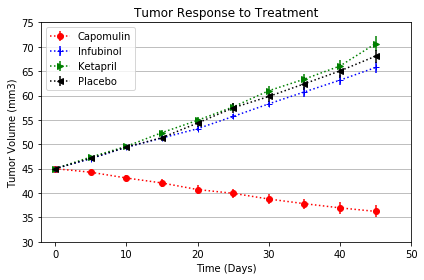

In [29]:
# Generate the Plot (with Error Bars)
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
x_axis = avg_tumor_vol_df_pivot.index
fig, ax = plt.subplots()
ax.errorbar(x_axis, y = avg_tumor_vol_df_pivot['Capomulin'],yerr=sem_tumor_vol_df["Capomulin"], marker = "o", label="Capomulin", color="red", ls=':')
ax.errorbar(x_axis, y = avg_tumor_vol_df_pivot['Infubinol'],yerr=sem_tumor_vol_df["Infubinol"], marker = "+", label="Infubinol", color="blue",ls=':')
ax.errorbar(x_axis, y = avg_tumor_vol_df_pivot['Ketapril'],yerr=sem_tumor_vol_df["Ketapril"], marker = ">", label="Ketapril", color="green",ls=':')
ax.errorbar(x_axis, y = avg_tumor_vol_df_pivot['Placebo'],yerr=sem_tumor_vol_df["Placebo"], marker = "<", label="Placebo", color="black",ls=':')
ax.set(xlabel="Time (Days)", ylabel = "Tumor Volume (mm3)", title = "Tumor Response to Treatment");
ax.set_xlim(-2,50)
ax.set_ylim(30,75)
ax.grid(axis = 'y')
ax.legend(loc="best")
fig.tight_layout()


# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop","matplotlib-challenge", "Images", "Tumot_Response_to_Treatment.png")
path
fig.savefig(path)


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

#average of met response to treatment data
met_response = drug_timepoint["Metastatic Sites"].mean()
met_response
# Convert to DataFrame
met_response_df = pd.DataFrame(met_response)
met_response_df.head()

#reset index for drug
met_response_df = met_response_df.reset_index()
met_response_df



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#SE of met response to treatment
sem_met_response = drug_timepoint["Metastatic Sites"].sem()
sem_met_response
# Convert to DataFrame
sem_met_response_df = pd.DataFrame(sem_met_response)
sem_met_response_df.head()

#reset index for drug
sem_met_response_df = sem_met_response_df.reset_index()
sem_met_response_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
met_response_df = met_response_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
met_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
#reframe SE df
sem_met_response_df = sem_met_response_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sem_met_response_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


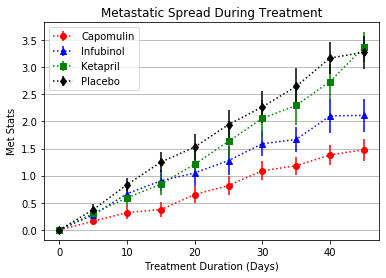

In [30]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()
ax2.errorbar(x_axis,met_response_df["Capomulin"], yerr=sem_met_response_df["Capomulin"], color="red", marker="o", label="Capomulin",ls=':');
ax2.errorbar(x_axis,met_response_df["Infubinol"], yerr=sem_met_response_df["Infubinol"], color="blue", marker="^", label="Infubinol",ls=':');
ax2.errorbar(x_axis,met_response_df["Ketapril"], yerr=sem_met_response_df["Ketapril"], color="green", marker="s", label="Ketapril",ls=':');
ax2.errorbar(x_axis,met_response_df["Placebo"], yerr=sem_met_response_df["Placebo"], color="black", marker="d", label="Placebo",ls=':');
ax2.grid(axis = 'y')

#set labels 
ax2.set(xlabel = 'Treatment Duration (Days)', ylabel = "Met Stats", title = "Metastatic Spread During Treatment");

#legend
ax2.legend();

fig.tight_layout()


# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop","matplotlib-challenge", "Images", "Metastic_Spready_During.png")
path
fig.savefig(path)



## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_count = drug_timepoint["Mouse ID"].count().reset_index(name="Mice Count")
mice_count
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df.head()

#reset index for drug
mice_count_df = mice_count_df.reset_index()
mice_count_df.head()


,index,Drug,Timepoint,Mice Count
0,0,Capomulin,0,25
1,1,Capomulin,5,25
2,2,Capomulin,10,25
3,3,Capomulin,15,24
4,4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.pivot(index='Timepoint',columns='Drug', values='Mice Count')
mice_count_df
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


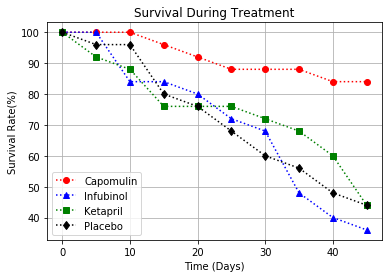

In [31]:
# Generate the Plot (Accounting for percentages)
#Creating a scatter plot that shows the number of mice still alive through the course 
#of treatment (Survival Rate)
y_axis1 = (mice_count_df.loc[:,'Capomulin']/25)*100
y_axis2 = (mice_count_df.loc[:,'Infubinol']/25)*100
y_axis3 = (mice_count_df.loc[:,'Ketapril']/25)*100
y_axis4 = (mice_count_df.loc[:,'Placebo']/25)*100

fig3,ax3 = plt.subplots()
ax3.errorbar(x_axis,y_axis1, color="red", label="Capomulin", marker="o",ls=':')
ax3.errorbar(x_axis,y_axis2, color="blue", label="Infubinol", marker="^",ls=':')
ax3.errorbar(x_axis,y_axis3, color="green", label="Ketapril", marker="s",ls=':')
ax3.errorbar(x_axis,y_axis4, color="black", label="Placebo", marker="d",ls=':')

ax3.grid()

#labels and legend
ax3.set(title="Survival During Treatment", xlabel="Time (Days)", ylabel ="Survival Rate(%)");
ax3.legend(loc="best");

fig.tight_layout()
# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop","matplotlib-challenge", "Images", "Survival_During_Treatment.png")
path
fig.savefig(path)


## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
#Creating a bar graph that compares the total % tumor volume change 
#for each drug across the full 45 days.
tumor_pct_change = (avg_tumor_vol_df_pivot.iloc[-1]/(avg_tumor_vol_df_pivot.iloc[0])-1)*100
tumor_pct_change = round(tumor_pct_change)
tumor_pct_change

# Display the data to confirm


Drug
Capomulin   -19.0
Ceftamin     43.0
Infubinol    46.0
Ketapril     57.0
Naftisol     54.0
Placebo      51.0
Propriva     47.0
Ramicane    -22.0
Stelasyn     52.0
Zoniferol    47.0
dtype: float64

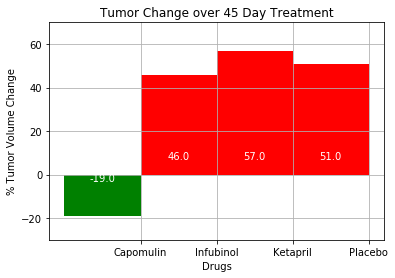

In [32]:
# Store all Relevant Percent Changes into a Tuple
tup_tumor_pct_change = (tumor_pct_change["Capomulin"], 
                        tumor_pct_change["Infubinol"], 
                        tumor_pct_change["Ketapril"], 
                        tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
pass_drugs = []
fail_drugs = []

for value in tup_tumor_pct_change:
    if value > 0:
        pass_drugs.append(value)
    else:
        fail_drugs.append(value)

        
#plot
x = np.arange(len(tup_tumor_pct_change))
fail_y = fail_drugs
pass_y = pass_drugs
width = 1

fig, ax = plt.subplots()

failed = ax.bar(x[0], fail_y, width, color="g")
passed = ax.bar(x[1:], pass_y, width, color="r") 

# Orient widths. Add labels, tick marks, etc.
ax.set(title = "Tumor Change over 45 Day Treatment",xlabel= "Drugs", ylabel="% Tumor Volume Change", ylim=(-30,70));
ax.grid()
ax.set_xticks(x + .5)
ax.set_xticklabels(['Capomulin','Infubinol','Ketapril','Placebo']);
ax.grid(True)




#plz explain
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, label_position),
                    xytext=(0, 9),  
                    textcoords="offset points",
                    ha='center', va='bottom', color="w")

#call functions to implement the function calls
autolabel(failed)  
autolabel(passed)

#save the figure
import os
path = os.path.join(os.path.expanduser("~"), "Desktop","matplotlib-challenge", "Images", "Tumot_Pct_Vol_Change.png")
path
fig.savefig(path)